## Import Depedencies

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import mediapipe as mp
from gtts import gTTS
from pygame import mixer


pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Keypoints Using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utilities

In [3]:
def sound(text, language):
    output = gTTS(text=text, lang=language, slow=True)
    output.save(f'{text}.mp3')
    mixer.init()
    mixer.music.load(f'{text}.mp3')
    mixer.music.play()
    time.sleep(1)
    mixer.music.unload()
    os.remove(f'{text}.mp3')

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color Conversion
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color Conversion
    return image, results


In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image, results): 
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    # draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    # draw right hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [7]:
def sound(text, language):
    output = gTTS(text=text, lang=language, slow=True)
    output.save(f'{text}.mp3')
    mixer.init()
    mixer.music.load(f'{text}.mp3')
    mixer.music.play()
    time.sleep(0.1)
    mixer.music.unload()
    os.remove(f'{text}.mp3')

In [10]:
cap = cv2.VideoCapture(0)

# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # read feed
        ret, frame = cap.read()

        # make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # draw landmarks
        draw_styled_landmarks(image, results)
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)

        key = cv2.waitKey(10)

        if key == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
results.right_hand_landmarks.landmark

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
draw_landmarks(frame, results)

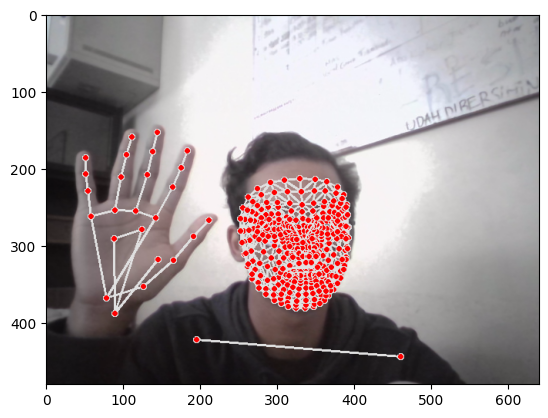

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [82]:
len(results.right_hand_landmarks.landmark)

21

In [83]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose, face, left_hand, right_hand])

In [84]:
result_test = extract_keypoints(results)
result_test.shape

(1662,)

In [85]:
np.save('0', result_test)

# Setup Folders for Collection

In [228]:
# path for the exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# actions to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# thirty videos worth of data
no_sequences = 10

# videos are going to be 30 frames in length
sequence_length = 10

In [229]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoints Values for Training and Testing

In [230]:
cap = cv2.VideoCapture(0)

# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # loop through actions
    for action in actions:
        # loop through sequrnces aka videos
        for sequence in range(no_sequences):
            # loop through video length aka sequence length
            for frame_num in range(sequence_length):
        # read feed
                ret, frame = cap.read()

                # make detection
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # new apply collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(1000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                # draw landmarks
                draw_styled_landmarks(image, results)

                # show to screen
                cv2.imshow('OpenCV Feed', image)
                
                # new export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                key = cv2.waitKey(10)
                if key == 27:
                    break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# Preprocess Data and Create Labels and Features

In [231]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical

In [232]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [233]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), '{}.npy'.format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [234]:
np.array(sequences).shape

(30, 10, 1662)

In [235]:
np.array(labels).shape

(30,)

In [236]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Build and Train LSTM Neural Network

In [238]:
from tensorflow import keras
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard
from keras.models import Sequential

In [239]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [240]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [241]:
res = [0.7, 0.2, 0.1]

In [242]:
actions[np.argmax(res)]

'hello'

In [243]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [245]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 0.2961 - categorical_accuracy: 0.8148
Epoch 2/200
1/1 [==============================] - 0s 47ms/step - loss: 0.2820 - categorical_accuracy: 0.8519
Epoch 3/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2517 - categorical_accuracy: 0.8519
Epoch 4/200
1/1 [==============================] - 0s 73ms/step - loss: 0.2729 - categorical_accuracy: 0.8889
Epoch 5/200
1/1 [==============================] - 0s 61ms/step - loss: 0.3026 - categorical_accuracy: 0.8148
Epoch 6/200
1/1 [==============================] - 0s 49ms/step - loss: 0.2233 - categorical_accuracy: 0.8889
Epoch 7/200
1/1 [==============================] - 0s 39ms/step - loss: 0.2710 - categorical_accuracy: 0.9259
Epoch 8/200
1/1 [==============================] - 0s 45ms/step - loss: 0.2797 - categorical_accuracy: 0.8519
Epoch 9/200
1/1 [==============================] - 0s 39ms/step - loss: 0.4571 - categorical_accuracy: 0.7778
Epoch 10/200

In [246]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 10, 64)            442112    
                                                                 
 lstm_16 (LSTM)              (None, 10, 128)           98816     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

# Make Predictions

In [247]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [251]:
actions[np.argmax(y_test[2])]

'thanks'

In [252]:
actions[y_test[2]]

array(['hello', 'thanks', 'hello'], dtype='<U8')

# Save Weights

In [253]:
model.save('action.h5')

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
del model

NameError: name 'model' is not defined

In [39]:
model.load_weights('action.h5')

NameError: name 'model' is not defined

# Evaluation using Confusion Matrix and Accuracy

In [254]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [263]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 46ms/step


In [264]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [265]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 1],
        [0, 1]],

       [[2, 0],
        [0, 1]],

       [[2, 0],
        [1, 0]]], dtype=int64)

In [266]:
accuracy_score(ytrue, yhat)

0.6666666666666666

# Test in Real Time

In [267]:
res

array([[9.5337224e-01, 1.4679142e-05, 4.6613064e-02],
       [8.8393605e-01, 7.3263123e-05, 1.1599069e-01],
       [3.1814895e-21, 1.0000000e+00, 3.5578213e-18]], dtype=float32)

In [268]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0,85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

In [269]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [270]:
# new detection variables
sequence = []
sentence = []
threshold = 0.4
temp = 0

cap = cv2.VideoCapture(0)

# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # read feed
        ret, frame = cap.read()

        # make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # draw landmarks
        draw_styled_landmarks(image, results)

        # prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[:10]

        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            temp += 1
            if temp > 50:
                temp = 0
                sound(actions[np.argmax(res)], 'en')

        # viz logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

        # show to screen
        cv2.imshow('OpenCV Feed', image)

        key = cv2.waitKey(10)

        if key == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
iloveyou
<class 'mediapipe.p

In [69]:
res

array([[1.0000000e+00, 3.3806281e-11, 2.5608953e-08],
       [9.6115303e-01, 3.2120752e-08, 3.8847040e-02],
       [2.3489127e-11, 1.0000000e+00, 2.8712740e-12],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [2.6750746e-07, 3.5230765e-22, 9.9999976e-01]], dtype=float32)